# Diyabet Hastalarının SVM modeli ile öngörümü

Bu projede Hindistanda 21 yaş üzerindeki kadınların diyabet hastası olmalarını tahmin eden model yazdıldı.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib as plt
import seaborn as sns
sns.set_style('whitegrid')

Gerekli kütüphaneleri import edip stil belirledim.

In [77]:
df = pd.read_csv('C:/Users/Enes Dinç/Desktop/diabetes/diabetes.csv')

Sistemden dataframe çektim.

In [78]:
df.head(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


Dataframin ilk 5 değerini görüntüledim. 9 sütundan oluşuyor.

In [79]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


Dataframe bilgilerini listeledim. 768 satır 9 sütun olduğunu gördüm.

In [80]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


Dataframin özelliklerini listeledim.

In [81]:
df_copy = df.copy(deep=True)
df_copy[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']] = df_copy[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']].replace(0,np.NaN)
print(df_copy.isnull().sum())

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64


Dataframede bulunan 0 değerlerini NaN olarak değiştirdim. Bunun nedeni Glucose BloodPressure gibi sütunlarda 0 olamaz.

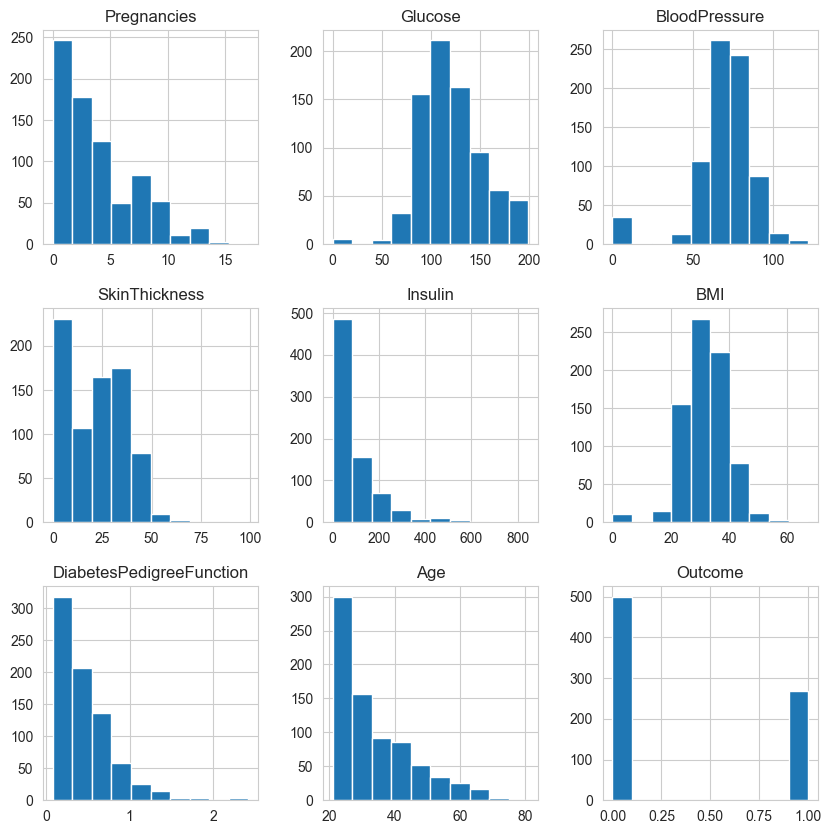

In [82]:
p = df.hist(figsize = (10,10))

Histogram olarak görselleştirdim

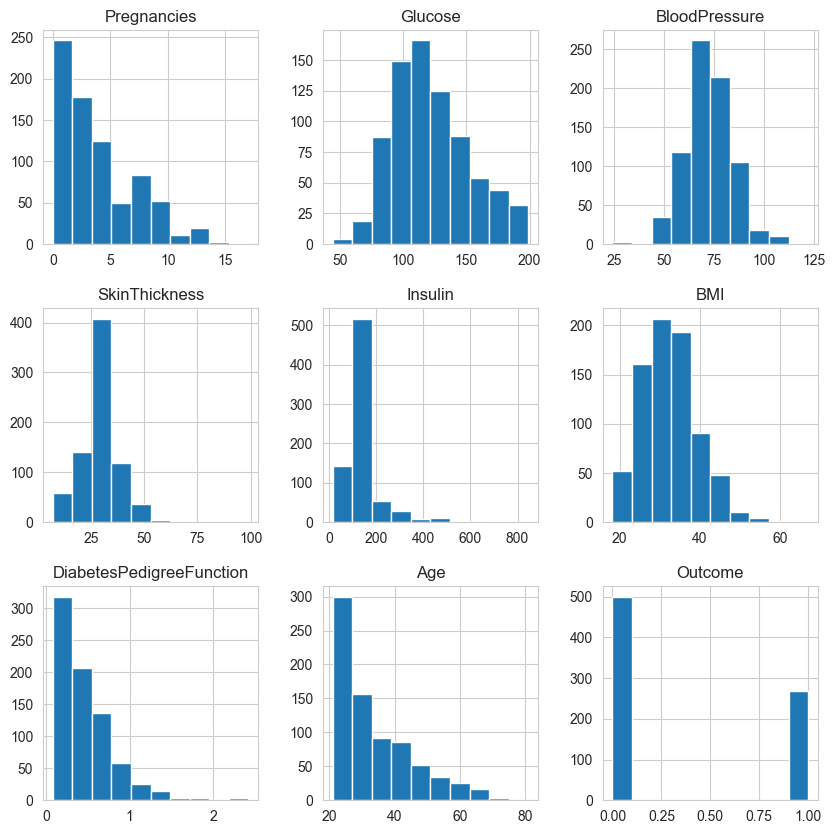

In [83]:
df_copy['Glucose'].fillna(df_copy['Glucose'].median(),inplace=True)
df_copy['BloodPressure'].fillna(df_copy['BloodPressure'].median(),inplace=True)
df_copy['SkinThickness'].fillna(df_copy['SkinThickness'].median(),inplace=True)
df_copy['Insulin'].fillna(df_copy['Insulin'].median(),inplace=True)
df_copy['BMI'].fillna(df_copy['BMI'].median(),inplace=True)
p = df_copy.hist(figsize = (10,10))

Boş satırları doldurmak için dolu olan aynı sütundaki verilerin ortalamasını aldım ve farkı görmek için Histogram olarak görselleştirdim.

In [84]:
print(df_copy['Outcome'].value_counts())

0    500
1    268
Name: Outcome, dtype: int64


Toplam diyabet hastası ve hasta olmayanları listeledim.

In [85]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = pd.DataFrame(scaler.fit_transform(df_copy.drop(['Outcome'],axis=1),),columns=['Pregnancies', 'Glucose','BloodPressure', 'SkinThickness', 'Insulin', 'BMI','DiabetesPedigreeFunction', 'Age'])
X.head(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.639947,0.866045,-0.031990,0.670643,-0.181541,0.166619,0.468492,1.425995
1,-0.844885,-1.205066,-0.528319,-0.012301,-0.181541,-0.852200,-0.365061,-0.190672
2,1.233880,2.016662,-0.693761,-0.012301,-0.181541,-1.332500,0.604397,-0.105584
3,-0.844885,-1.073567,-0.528319,-0.695245,-0.540642,-0.633881,-0.920763,-1.041549
4,-1.141852,0.504422,-2.679076,0.670643,0.316566,1.549303,5.484909,-0.020496


Dataseti standart scaler kullanarak daha verimli bir hale getirdim. SVM(support vector machine kullanacağım için gerekli 8 sütunu tek parça haline getirdim.

In [98]:
y = df_copy['Outcome']
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=1/3,random_state=1,stratify=y)

In [ ]:
Support Vector Machine modelini kullanmak için test ve train oluşturdum.

In [99]:
from sklearn import svm #
train = X_train
test = y_train
pred = svm.SVC()
pred.fit(X, y)
pred.score(X_train,y_train)

0.826171875

SVM modeli çağırdım ve skorun öngörümünü yaptım ve 0.82 (%82) doğruluk buldurdum

In [102]:
from sklearn.metrics import confusion_matrix 
y_predict = pred.predict(X_test)
confusion_matrix(y_test,y_predict)
pd.crosstab(y_test, y_predict, rownames=['True'], colnames=['Predicted'],margins=True)

Predicted,0,1,All
True,,,
0,158,9,167
1,33,56,89
All,191,65,256


Model 158 diyabet hastası olmayan kişileri doğru buldu
Model 9 kişiyi diyabet hastasını yanlış buldu
Model 56 diyabet hastasını doğru buldu
Model 33 diyabet hastasını yanlış buldu

In [96]:
from sklearn.metrics import classification_report  
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           0       0.83      0.95      0.88       167
           1       0.86      0.63      0.73        89

    accuracy                           0.84       256
   macro avg       0.84      0.79      0.80       256
weighted avg       0.84      0.84      0.83       256



Modelin doğruluğunu, hassasiyetini ve bunların harmonik ortalaması olan f1-score listeledim.

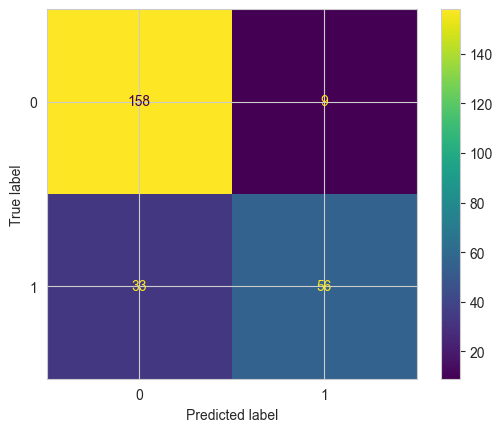

In [100]:
from sklearn.metrics import ConfusionMatrixDisplay
y_predict = clf.predict(X_test)
cm = confusion_matrix(y_test, y_predict)
cm_display = ConfusionMatrixDisplay(cm).plot()

In [ ]:
Modeli ConfusionMatrixDisplay kullanarak görselleştirdim.

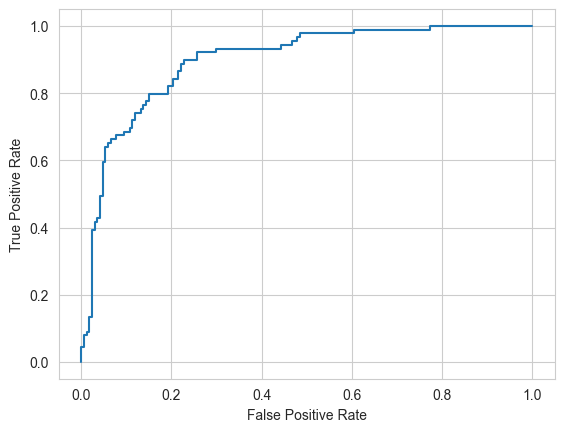

In [91]:
from sklearn.metrics import roc_curve
from sklearn.metrics import RocCurveDisplay
y_score = clf.decision_function(X_test)
fpr, tpr, _ = roc_curve(y_test, y_score, pos_label=clf.classes_[1])
roc_display = RocCurveDisplay(fpr=fpr, tpr=tpr).plot()

Burada değerlerin True Positive Rate yakın olduğu ve birden hızlandığını yani modelin doğruluğunun yüksek olduğunu gördüm.